<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/Colab'e_ho%C5%9F_geldiniz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from warnings import filterwarnings


In [4]:
df=pd.read_csv('/content/SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
df.drop('UNIXTime',axis = 1,inplace=True)

In [6]:
df[['Date','hours','idn']] = df.Data.str.split(expand=True)
df.drop(['hours','idn','Data'],axis = 1,inplace=True)
df['hour'] = pd.to_datetime(df.Time).dt.hour
df['minute'] = pd.to_datetime(df.Time).dt.minute
df['second'] =pd.to_datetime(df.Time).dt.second
df['month'] = pd.to_datetime(df.Date).dt.month
df['day'] =pd.to_datetime(df.Date).dt.day
df['SunRiseHour'] = pd.to_datetime(df.TimeSunRise).dt.hour
df['SunRiseMin'] = pd.to_datetime(df.TimeSunRise).dt.minute
df['SunRiseSec'] = pd.to_datetime(df.TimeSunRise).dt.second
df['SunSetHour'] = pd.to_datetime(df.TimeSunSet).dt.hour
df['SunSetMin'] = pd.to_datetime(df.TimeSunSet).dt.minute
df['SunSetSec'] = pd.to_datetime(df.TimeSunSet).dt.second

/tmp/ipython-input-3767852155.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df.Time).dt.hour
/tmp/ipython-input-3767852155.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['minute'] = pd.to_datetime(df.Time).dt.minute
/tmp/ipython-input-3767852155.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['second'] =pd.to_datetime(df.Time).dt.second
/tmp/ipython-input-3767852155.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expecte

In [7]:
df.tail(3)

,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Date,...,minute,second,month,day,SunRiseHour,SunRiseMin,SunRiseSec,SunSetHour,SunSetMin,SunSetSec
32683,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,12/1/2016,...,10,1,12,1,6,41,0,17,42,0
32684,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,12/1/2016,...,5,2,12,1,6,41,0,17,42,0
32685,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00,12/1/2016,...,0,2,12,1,6,41,0,17,42,0


In [8]:
df.drop(['Date','TimeSunRise','TimeSunSet','Time'],axis = 1 , inplace= True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Radiation,32686.0,207.124697,315.916387,1.11,1.2300,2.66,354.235,1601.26
Temperature,32686.0,51.103255,6.201157,34.00,46.0000,50.00,55.000,71.00
Pressure,32686.0,30.422879,0.054673,30.19,30.4000,30.43,30.460,30.56
Humidity,32686.0,75.016307,25.990219,8.00,56.0000,85.00,97.000,103.00
WindDirection(Degrees),32686.0,143.489821,83.167500,0.09,82.2275,147.70,179.310,359.95
Speed,32686.0,6.243869,3.490474,0.00,3.3700,5.62,7.870,40.50
hour,32686.0,11.557425,6.912034,0.00,6.0000,12.00,18.000,23.00
minute,32686.0,27.556691,17.268507,0.00,15.0000,30.00,45.000,57.00
second,32686.0,17.441902,12.951109,0.00,5.0000,18.00,22.000,59.00
month,32686.0,10.526066,1.096691,9.00,10.0000,11.00,11.000,12.00


/tmp/ipython-input-1250732977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='Radiation', data=df, palette='magma')


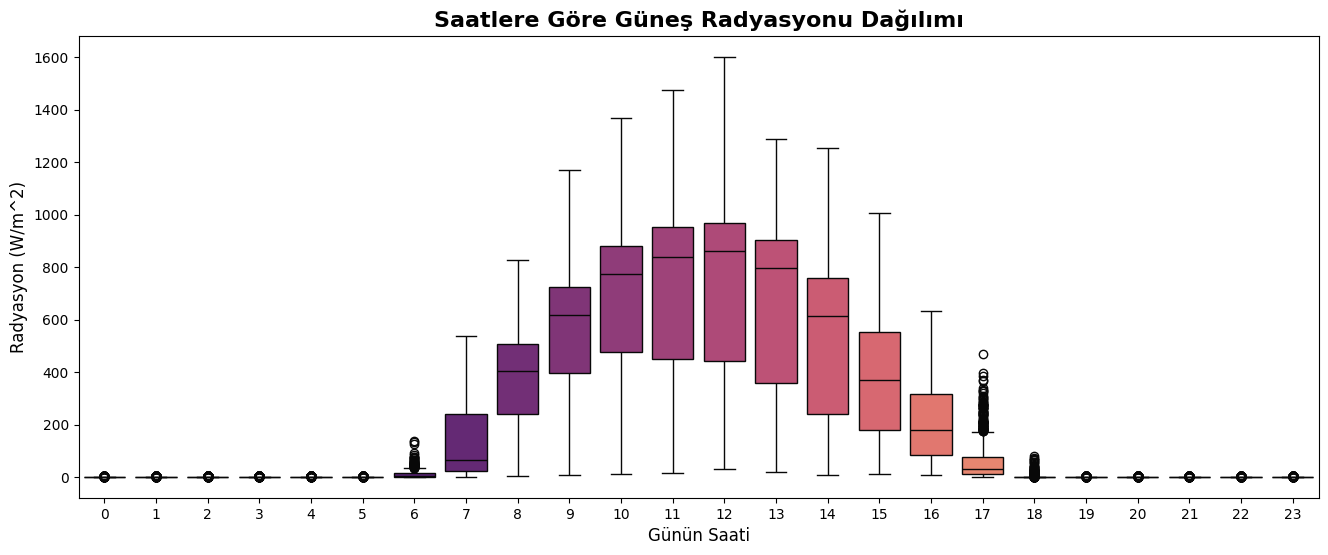

In [10]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='hour', y='Radiation', data=df, palette='magma')
plt.title('Saatlere Göre Güneş Radyasyonu Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Günün Saati', fontsize=12)
plt.ylabel('Radyasyon (W/m^2)', fontsize=12)
plt.show()

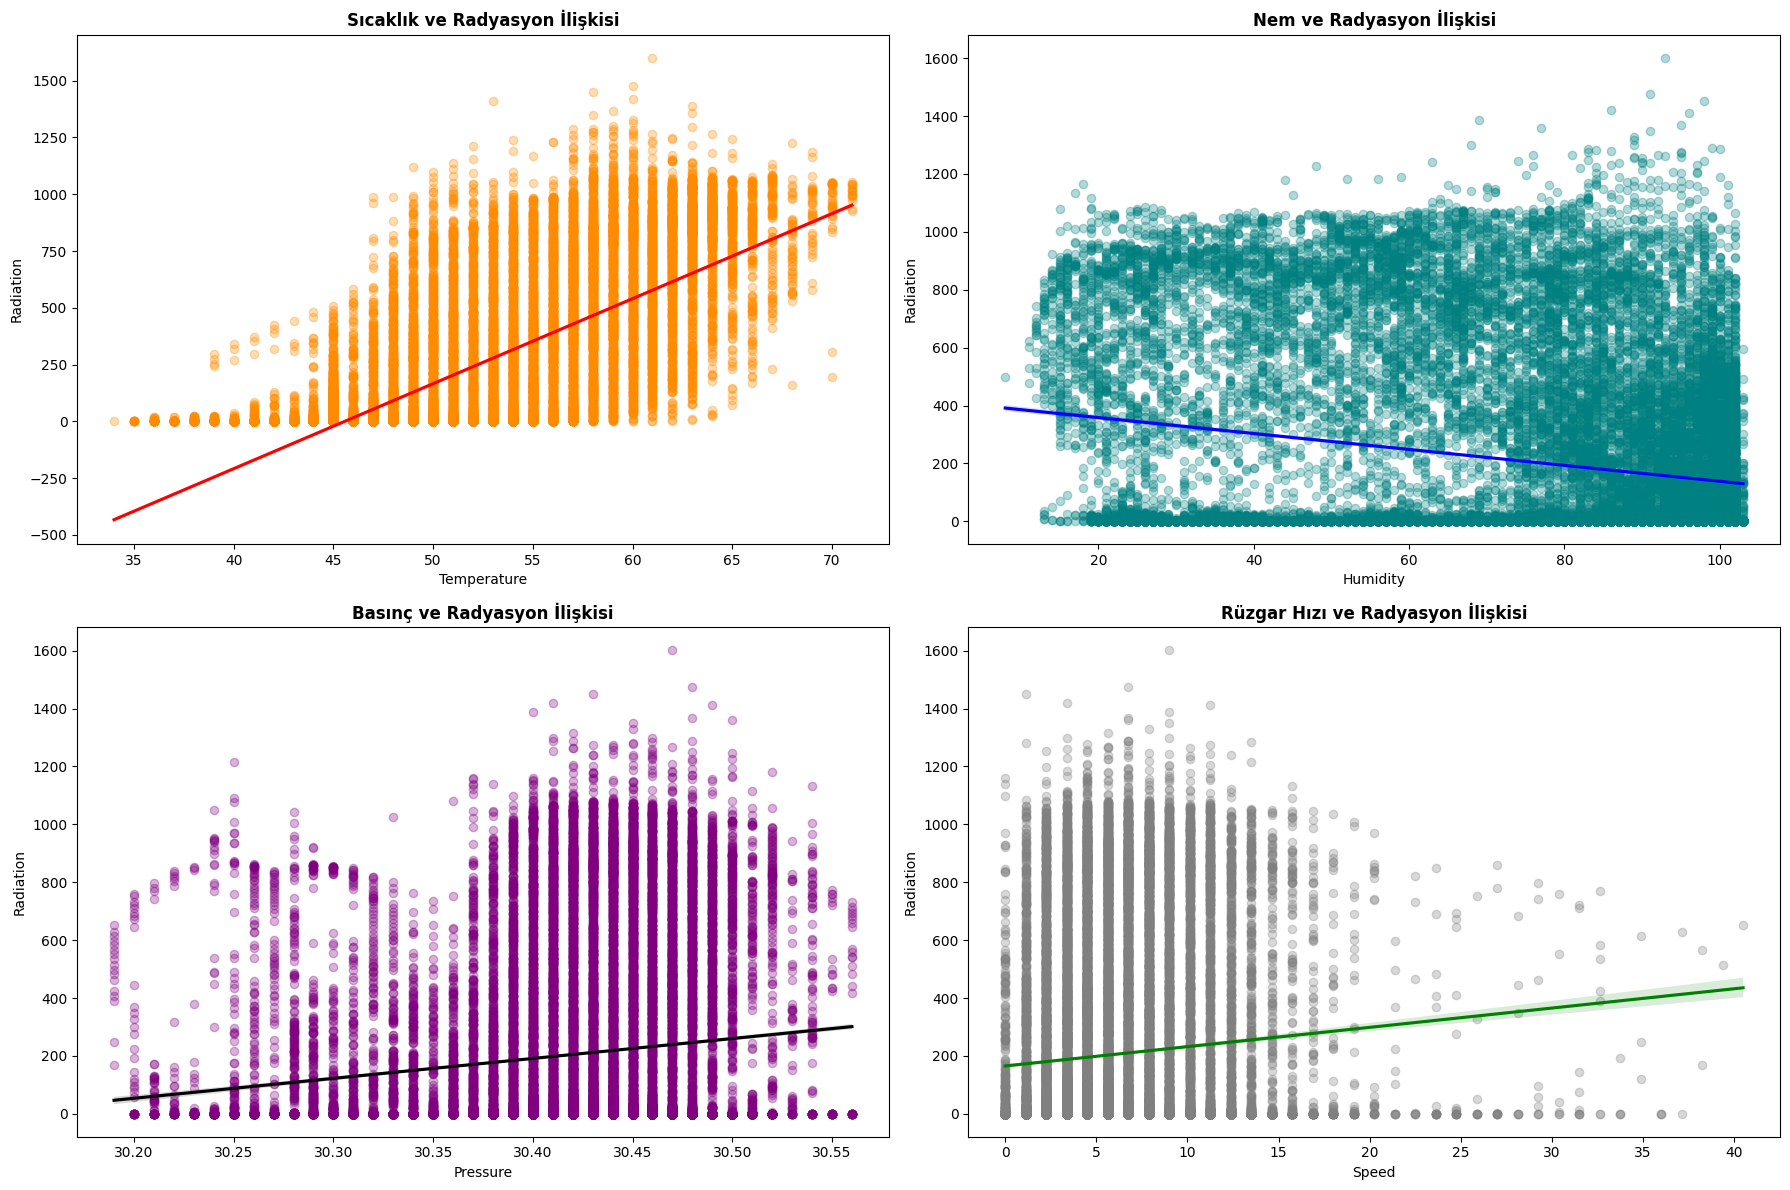

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.regplot(ax=axes[0, 0], x='Temperature', y='Radiation', data=df,
            scatter_kws={'alpha':0.3, 'color':'darkorange'}, line_kws={'color':'red'})
axes[0, 0].set_title('Sıcaklık ve Radyasyon İlişkisi', fontsize=12, fontweight='bold')
sns.regplot(ax=axes[0, 1], x='Humidity', y='Radiation', data=df,
            scatter_kws={'alpha':0.3, 'color':'teal'}, line_kws={'color':'blue'})
axes[0, 1].set_title('Nem ve Radyasyon İlişkisi', fontsize=12, fontweight='bold')
sns.regplot(ax=axes[1, 0], x='Pressure', y='Radiation', data=df,
            scatter_kws={'alpha':0.3, 'color':'purple'}, line_kws={'color':'black'})
axes[1, 0].set_title('Basınç ve Radyasyon İlişkisi', fontsize=12, fontweight='bold')
sns.regplot(ax=axes[1, 1], x='Speed', y='Radiation', data=df,
            scatter_kws={'alpha':0.3, 'color':'gray'}, line_kws={'color':'green'})
axes[1, 1].set_title('Rüzgar Hızı ve Radyasyon İlişkisi', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

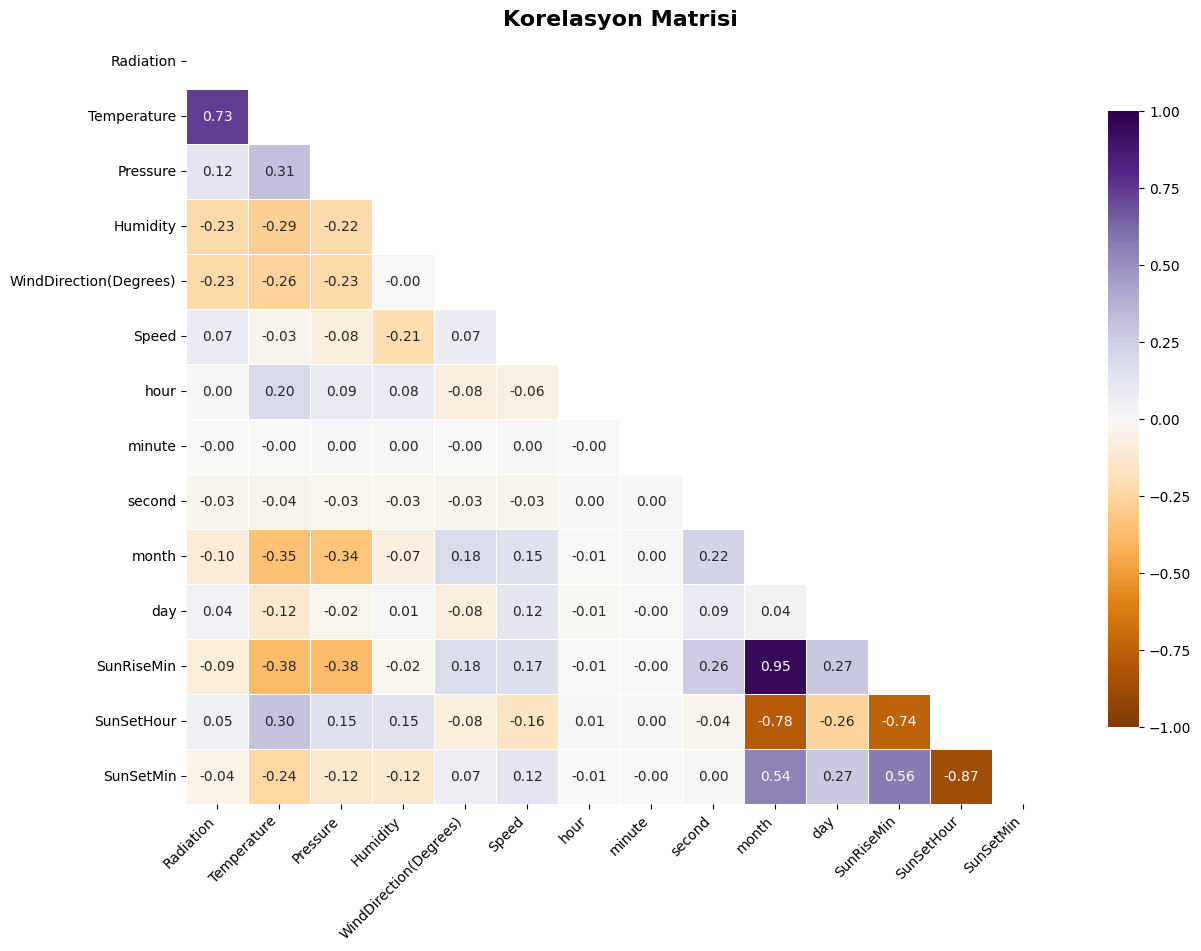

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, numeric_df.std() > 0]
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,
            mask=mask,
            cmap='PuOr',
            center=0,
            vmax=1, vmin=-1,
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Korelasyon Matrisi', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

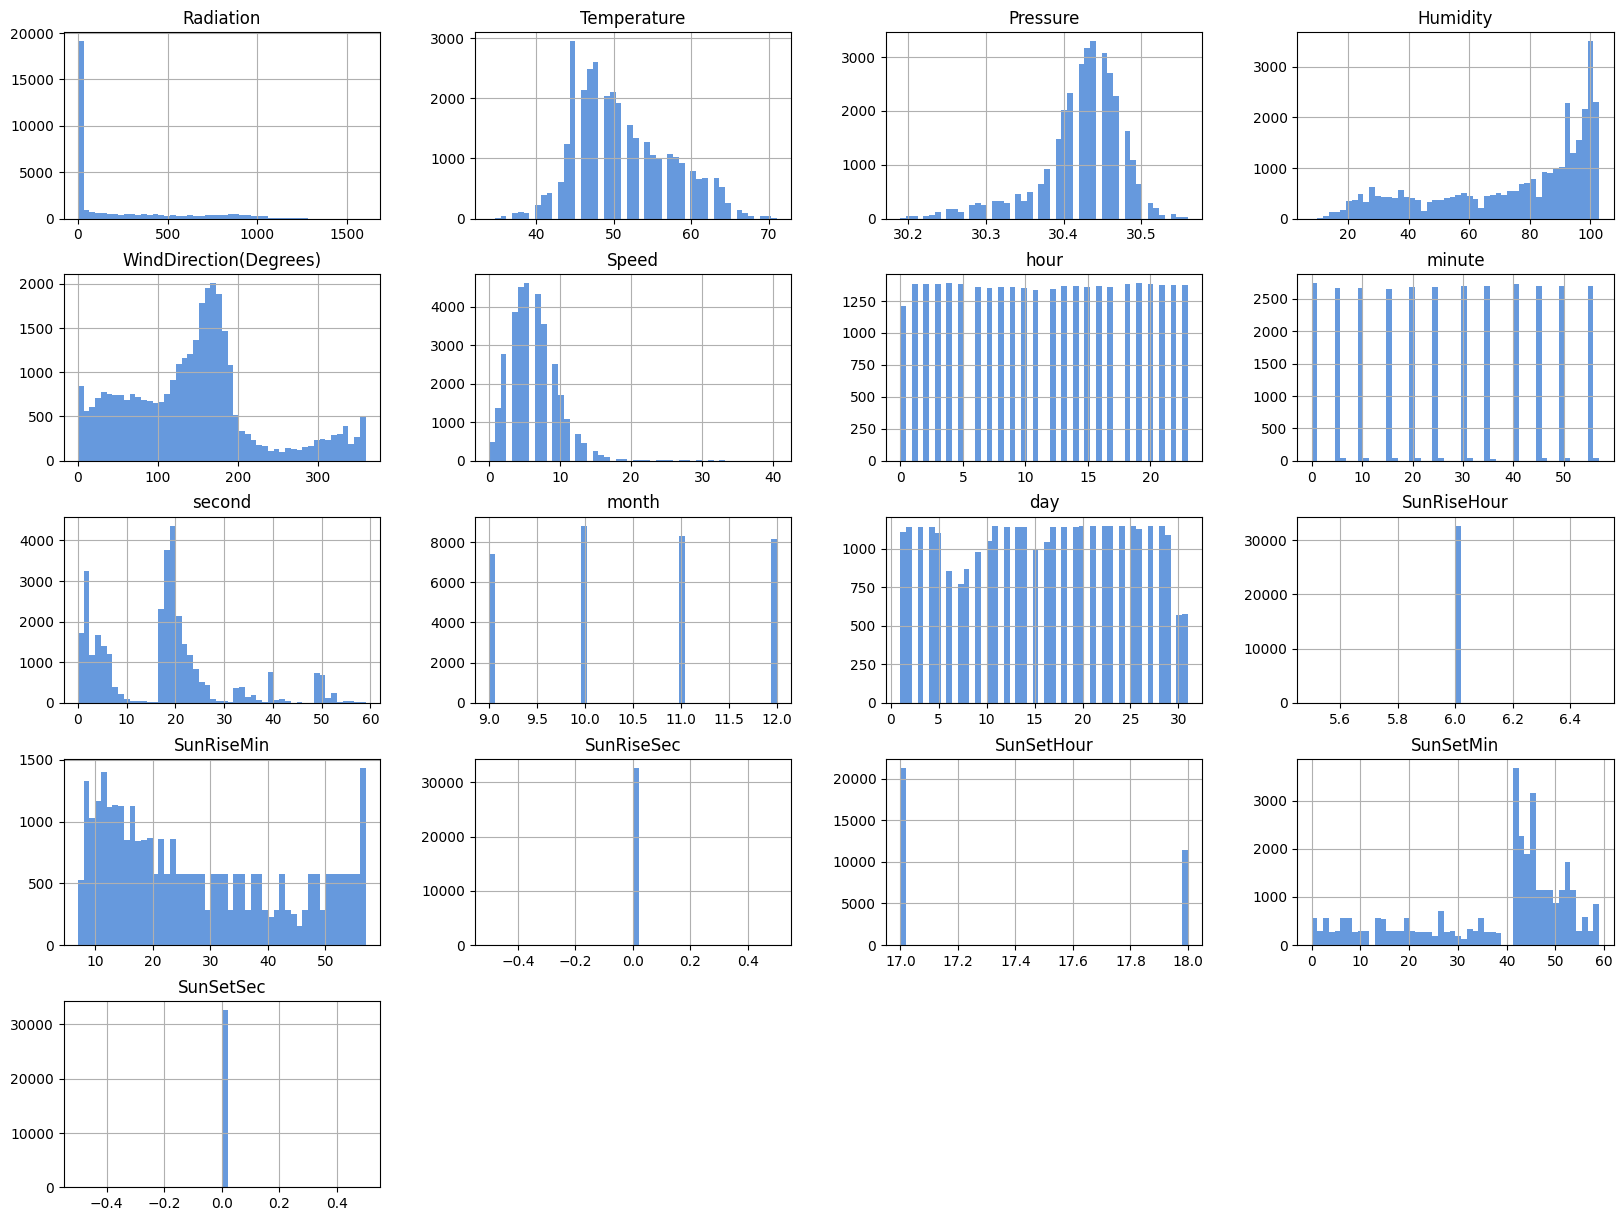

In [13]:
df.hist(bins=50,figsize=(20,15),color = ("#69d"))
plt.show()

In [14]:
y=df['Radiation']
x=df.drop(columns=['Radiation'],axis=1)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [16]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb_params = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}
rf_params={
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}


In [17]:
xgb_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=xgb_params,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)
rf_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_params,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

In [18]:
xgb_search.fit(x_train,y_train)
rf_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [23]:
bestxgb=xgb_search.best_estimator_
bestrf=rf_search.best_estimator_
bestxgb.fit(x_train,y_train)
bestrf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [27]:
from sklearn.linear_model import Ridge
estimators = [
    ('rf', bestrf),
    ('xgb', bestxgb)
]
stack = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    cv=5,
    n_jobs=-1
)
stack.fit(x_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_wei...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=-1,
                                            num_parallel_tree=None, ...))],
                  final_estimator=Ridge(), n_jobs=-1)

In [28]:
y_pred=stack.predict(x_test)
r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)


MSE:  6099.673469035204 R2 <function r2_score at 0x7fe5372298a0>


In [30]:
r2_score(y_pred,y_test)

0.9353401940834241

In [35]:
rmse=np.sqrt(mse)
rmse

np.float64(78.10040633079448)

rmse=78.100,r2=0.94